In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=15)
n_sampling = 5
n = n_sampling
m = 6
M = 1
init_arr_item = 0.0
learning_rate = 0.001
TRAIN_ITER = 2000

In [72]:
#ODE Critical Dumped
Critical_Dumped = np.array(
        [1.          ,  0.9980310417,  0.9921647546,  0.982472909 ,
        0.9690414108,  0.9519697845,  0.9313706249,  0.9073689737,
        0.8801016795,  0.849716714 ,  0.8163724522,  0.7802369177,
        0.7414870035,  0.7003076647,  0.6568910904,  0.6114358603,
        0.5641460809,  0.5152305196,  0.4649017207,  0.413375126 ,
        0.3608681911,  0.3075995058,  0.2537879208,  0.1996516846,
        0.1454075937,  0.0912701602,  0.03745079  , -0.0158429971,
       -0.0684083469, -0.1200477968, -0.1705699976, -0.2197903762,
       -0.2675317882, -0.3136251097, -0.357909813 , -0.4002344788,
       -0.4404572881, -0.4784464496, -0.514080601 , -0.5472491475,
       -0.5778525705, -0.6058026738, -0.631022786 , -0.6534479257,
       -0.6730249082, -0.6897124025, -0.7034809536, -0.7143129403,
       -0.7222025059, -0.7271554269, -0.7291889493, -0.7283315743,
       -0.7246228077, -0.7181128672, -0.7088623493, -0.6969418641,
       -0.6824316288, -0.6654210374, -0.6460081906, -0.6242994034,
       -0.600408684 , -0.5744571897, -0.5465726616, -0.5168888402,
       -0.4855448647, -0.4526846591, -0.4184563065, -0.3830114154,
       -0.3465044798, -0.3090922362, -0.2709330187, -0.2321861181,
       -0.1930111436, -0.1535673911, -0.1140132215, -0.0745054504,
       -0.0351987505,  0.003754929 ,  0.0422069253,  0.0800124039,
        0.1170308854,  0.1531267358,  0.1881696438,  0.2220350633,
        0.2546046337,  0.285766565 ,  0.3154159967,  0.3434553225,
        0.3697944836,  0.3943512278,  0.4170513356,  0.4378288112,
        0.4566260387,  0.473393905 ,  0.4880918848,  0.5006880942,
        0.5111593073,  0.5194909353,  0.5256769831,  0.5297199641,
        0.5316307794,  0.5314285699,  0.5291405445,  0.5248017686,
        0.5184549263,  0.5101500591,  0.4999442785,  0.4879014522,
        0.4740918675,  0.4585918763,  0.4414835191,  0.4228541313,
        0.4027959332,  0.381405608 ,  0.3587838644,  0.3350349905,
        0.3102664019,  0.2845881775,  0.2581125951,  0.2309536624,
        0.203226647 ,  0.1750476083,  0.1465329314,  0.1177988654,
        0.088961068 ,  0.0601341595,  0.0314312839,  0.0029636838,
       -0.0251597126, -0.0528326928, -0.0799521409, -0.1064184049,
       -0.1321356471, -0.1570121683, -0.180960722 , -0.203898798 ,
       -0.2257488868, -0.2464387264, -0.2659015144, -0.2840761068,
       -0.300907187 , -0.3163454067, -0.3303475111, -0.3428764278,
       -0.353901336 , -0.3633977138, -0.3713473487, -0.3777383362,
       -0.3825650461, -0.385828062 , -0.3875341099, -0.3876959473,
       -0.3863322415, -0.383467421 , -0.3791315077, -0.3733599292,
       -0.366193312 , -0.3576772569, -0.3478620974, -0.3368026429,
       -0.3245579066, -0.3111908228, -0.2967679536, -0.2813591698,
       -0.2650373477, -0.2478780387, -0.2299591432, -0.2113605708,
       -0.1921639049, -0.1724520582, -0.1523089317, -0.1318190728,
       -0.1110673334, -0.0901385351, -0.0691171352, -0.0480868979,
       -0.027130576 , -0.0063295973,  0.0142362391,  0.0344890553,
        0.054353177 ,  0.0737554036,  0.092625264 ,  0.1108952602,
        0.1285010962,  0.1453818881,  0.1614803636,  0.1767430396,
        0.1911203865,  0.2045669727,  0.217041592 ,  0.2285073731,
        0.2389318696,  0.248287133 ,  0.2565497656,  0.263700956 ,
        0.2697264957,  0.2746167771,  0.278366774 ,  0.2809760031,
        0.2824484705,  0.2827926011,  0.2820211462,  0.2801510816,
        0.2772034898,  0.2732034233,  0.2681797564,  0.2621650261,
        0.2551952569,  0.2473097757,  0.2385510165,  0.2289643145,
        0.2185976919,  0.2075016354,  0.1957288669,  0.1833341082,
        0.170373842 ,  0.1569060669,  0.142990051 ,  0.1286860826,
        0.1140552212,  0.0991590476,  0.0840594155,  0.0688182049,
        0.0534970785,  0.0381572423,  0.0228592109,  0.007662578 ,
       -0.0073742059, -0.0221940493, -0.0367414269, -0.0509625778,
       -0.0648056959, -0.0782211079, -0.0911614408, -0.1035817819,
       -0.1154398237, -0.1266959966, -0.1373135908, -0.1472588648,
       -0.1565011412, -0.1650128885, -0.1727697898, -0.1797507988,
       -0.1859381815, -0.1913175438, -0.1958778467, -0.1996114081,
       -0.2025138908, -0.2045842776, -0.2058248338, -0.2062410574,
       -0.2058416172, -0.2046382789, -0.2026458198, -0.1998819339,
       -0.1963671254, -0.1921245929, -0.1871801048, -0.1815618663,
       -0.175300377 , -0.1684282831, -0.1609802227, -0.1529926637,
       -0.1445037384, -0.1355530732, -0.1261816128, -0.116431444 ,
       -0.106345616 , -0.0959679586, -0.0853429004, -0.0745152871,
       -0.0635301997, -0.0524327745, -0.0412680249, -0.0300806666,
       -0.0189149448, -0.0078144669,  0.0031779612,  0.0140204939,
        0.0246723963,  0.0350941945,  0.0452478088,  0.0550966927,
        0.0646059513,  0.0737424623,  0.0824749815,  0.0907742425,
        0.0986130483,  0.10596635  ,  0.1128113212,  0.1191274169,
        0.1248964282,  0.130102524 ,  0.134732282 ,  0.138774712 ,
        0.1422212717,  0.1450658644,  0.1473048372,  0.1489369619,
        0.14996341  ,  0.1503877196,  0.1502157497,  0.1494556301,
        0.1481176996,  0.1462144384,  0.1437603927,  0.1407720908,
        0.1372679543,  0.1332682011,  0.1287947441,  0.1238710843,
        0.1185221976,  0.1127744187,  0.1066553209,  0.1001935917,
        0.0934189066,  0.0863618   ,  0.0790535344,  0.0715259684,
        0.0638114241,  0.0559425546,  0.0479522111,  0.0398733115,
        0.0317387102,  0.02358107  ,  0.0154327358,  0.0073256115,
       -0.0007089597, -0.0086403112, -0.0164385659, -0.0240747428,
       -0.03152086  , -0.0387500326, -0.045736564 , -0.0524560316,
       -0.0588853717, -0.0650029439, -0.0707886042, -0.0762237665,
       -0.0812914533, -0.0859763438, -0.090264813 , -0.0941449641,
       -0.0976066533, -0.1006415081, -0.103242938 , -0.1054061382,
       -0.1071280858, -0.10840753  , -0.1092449743, -0.1096426528,
       -0.1096045001, -0.1091361138, -0.1082447128, -0.1069390876,
       -0.1052295468, -0.1031278572, -0.10064718  , -0.0978020006,
       -0.0946080561, -0.0910822573, -0.0872426079, -0.0831081189,
       -0.0786987231, -0.0740351851, -0.0691390074, -0.0640323387,
       -0.0587378778, -0.0532787776, -0.0476785487, -0.0419609622,
       -0.0361499534, -0.0302695255, -0.0243436544, -0.018396195 ,
       -0.0124507886, -0.0065307732, -0.0006590951,  0.005141776 ,
        0.0108499298,  0.0164440939,  0.0219037101,  0.0272090056,
        0.0323410614,  0.0372818758,  0.0420144233,  0.0465227101,
        0.0507918233,  0.0548079763,  0.0585585491,  0.0620321226,
        0.0652185097,  0.0681087792,  0.0706952745,  0.0729716282,
        0.0749327723,  0.0765749401,  0.0778956655,  0.0788937769,
        0.0795693843,  0.0799238645,  0.0799598385,  0.0796811464,
        0.0790928169,  0.0782010321,  0.0770130899,  0.0755373606,
        0.0737832405,  0.0717611029,  0.0694822443,  0.0669588288,
        0.0642038298,  0.0612309683,  0.0580546502,  0.0546899004,
        0.0511522969,  0.0474579019,  0.0436231932,  0.0396649939,
        0.0356004021,  0.0314467203,  0.027221385 ,  0.022941896 ,
        0.0186257473,  0.0142903576,  0.0099530044,  0.0056307567,
        0.0013404111, -0.0029015722, -0.0070791277, -0.0111766445,
       -0.0151790209, -0.0190717184, -0.0228408107, -0.0264730319,
       -0.0299558191, -0.0332773543, -0.0364266004, -0.0393933355,
       -0.0421681827, -0.0447426365, -0.047109085 , -0.0492608291,
       -0.0511920967, -0.052898055 , -0.054374816 , -0.0556194419,
       -0.0566299432, -0.0574052756, -0.057945332 , -0.0582509311,
       -0.0583238027, -0.0581665697, -0.0577827263, -0.0571766134,
       -0.0563533913, -0.0553190083, -0.0540801698, -0.0526442991,
       -0.0510195019, -0.049214525 , -0.0472387132, -0.0451019667,
       -0.0428146937, -0.0403877641, -0.0378324608, -0.0351604295,
       -0.0323836303, -0.0295142859, -0.0265648271, -0.023547844 ,
       -0.0204760385, -0.0173621676, -0.0142189926, -0.0110592314,
       -0.0078955086, -0.0047403063, -0.0016059165,  0.0014956037,
        0.0045524771,  0.0075532493,  0.0104868296,  0.0133425297,
        0.0161101011,  0.0187797696,  0.0213422689,  0.0237888679,
        0.0261114018,  0.028302294 ,  0.030354581 ,  0.0322619304,
        0.0340186586,  0.0356197452,  0.0370608438,  0.0383382913,
        0.0394491134,  0.0403910279,  0.0411624445,  0.0417624633], np.float32)

In [73]:
def split_sequence(sequence, n_steps):
	_X, _y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		_X.append(seq_x)
		_y.append(seq_y)
	return np.array(_X), np.array(_y)
x, y = split_sequence(Critical_Dumped, n_sampling)

In [74]:
w = np.ones([m,n], np.float32)*init_arr_item
v = np.ones([M,m], np.float32)*init_arr_item
b_j = np.zeros([m], np.float32)*init_arr_item
b_k = np.zeros([M], np.float32)*init_arr_item

z_pred = np.zeros([y.shape[0], m], np.float32)
y_pred = np.zeros([y.shape[0], M], np.float32)
E = np.zeros(M, np.float32)

v_new = np.zeros([M,m], np.float32)
delta_k = np.zeros(M, np.float32)

w_new = np.zeros([m,n], np.float32)
delta_j = np.zeros(m, np.float32)

In [75]:
def f_sigmoid(value):
    return 1.0/(1.0+np.exp(-value))

def f_sigmoid_derivation(value):
    return f_sigmoid(value)*(1-f_sigmoid(value))
  
def f_linear(value):
    return value

def f_linear_derivation(value):
    return np.ones(value.shape, np.float32)
  

def f_activation(value):
    return f_sigmoid(value)
  
def f_activation_derivation(value):
    return f_sigmoid_derivation(value)

def f_activation_output(value):
    return f_linear(value)

def f_activation_derivation_output(value):
    return f_linear_derivation(value)

In [76]:
def calc_z_j(x_train, w_train, b_j_train):
    for j in range(m):
        z_pred[:,j] = np.dot(x_train,w_train[j,:]) + b_j_train[j]
    
    return z_pred
    
def calc_y_k(z_train, v_train, b_k_train):
    for k in range(M):
        y_pred[:,k] = np.dot(z_train, v_train[k,:]) + b_k_train[k]
    
    return y_pred

In [77]:
def error_calc(target, output):
    for k in range(M):
        E[k] = 0.5*(target[k] - output[k])**2
    return np.sum(E)

In [78]:
def calc_v_new(v_last, y, y_prediction, z_prediction):
    delta_k = np.transpose(f_activation_derivation_output(y_prediction)*(np.reshape(y, (y.shape[0], 1)) - y_prediction))
        
    for j in range(m):
        v_new[:,j] = v_last[:,j] + learning_rate*np.dot(delta_k,z_prediction[:,j])
            
    return v_new, delta_k


def calc_w_new(w_last, v_new, delta_k, z_prediction, x_input):
    sum_v = np.dot(np.transpose(v_new), delta_k)
    
    delta_j = np.transpose(f_activation_derivation(z_prediction))*sum_v
    
    for i in range(n):
            w_new[:,i] = w_last[:,i] + learning_rate*np.dot(delta_j,x_input[:,i])
            
    return w_new, delta_j
    
 
def calc_b_k_new(delta_k, b_k_last):
    return b_k_last +  learning_rate*np.sum(delta_k)

def calc_b_j_new(delta_j, b_j_last):
    return b_j_last + learning_rate*np.sum(delta_j)

In [79]:
def train_model(train_count, w_train, v_train, b_j_train, b_k_train, y_train, x_train):
    for l in range(train_count):
        z_prediction = calc_z_j(x_train, w_train, b_j_train)
        z_prediction = f_activation(z_prediction)
        
        y_prediction = calc_y_k(z_prediction, v_train, b_k_train)
        y_prediction = f_activation_output(y_prediction)
        
        v_train, delta_k = calc_v_new(v_train, y_train, y_prediction, z_prediction)
        w_train, delta_j = calc_w_new(w_train, v_train, delta_k, z_prediction, x_train)
        
        b_k_train = calc_b_k_new(delta_k, b_k_train)
        b_j_train = calc_b_j_new(delta_j, b_j_train)
        
        print("Iterasi ke-" + str(l) + " Error : " + str(error_calc(y_train, y_prediction)))
        
    return v_train, w_train, b_k_train, b_j_train
        

In [80]:
v, w, b_k, b_j = train_model(TRAIN_ITER, w, v, b_j, b_k, y, x)

erasi ke-1441 Error : 0.018147003
Iterasi ke-1442 Error : 0.018146934
Iterasi ke-1443 Error : 0.018146878
Iterasi ke-1444 Error : 0.01814682
Iterasi ke-1445 Error : 0.018146764
Iterasi ke-1446 Error : 0.018146684
Iterasi ke-1447 Error : 0.01814664
Iterasi ke-1448 Error : 0.01814656
Iterasi ke-1449 Error : 0.01814649
Iterasi ke-1450 Error : 0.018146412
Iterasi ke-1451 Error : 0.018146366
Iterasi ke-1452 Error : 0.018146321
Iterasi ke-1453 Error : 0.018146241
Iterasi ke-1454 Error : 0.018146185
Iterasi ke-1455 Error : 0.018146116
Iterasi ke-1456 Error : 0.01814606
Iterasi ke-1457 Error : 0.01814598
Iterasi ke-1458 Error : 0.018145936
Iterasi ke-1459 Error : 0.018145867
Iterasi ke-1460 Error : 0.0181458
Iterasi ke-1461 Error : 0.01814573
Iterasi ke-1462 Error : 0.018145686
Iterasi ke-1463 Error : 0.018145617
Iterasi ke-1464 Error : 0.01814555
Iterasi ke-1465 Error : 0.01814547
Iterasi ke-1466 Error : 0.018145412
Iterasi ke-1467 Error : 0.018145345
Iterasi ke-1468 Error : 0.018145276
Itera

In [81]:
print(v, w, b_j, b_k)

[[-0.44284824 -0.44284824 -0.44284824 -0.44284824 -0.44284937 -0.44284937]] [[-0.20205994 -0.26268882 -0.3215263  -0.37836498 -0.4330066 ]
 [-0.20205994 -0.26268882 -0.3215263  -0.37836498 -0.4330066 ]
 [-0.20205994 -0.26268882 -0.3215263  -0.37836498 -0.4330066 ]
 [-0.20205994 -0.26268882 -0.3215263  -0.37836498 -0.4330066 ]
 [-0.20206082 -0.2626898  -0.32152727 -0.3783662  -0.43300763]
 [-0.20206082 -0.2626898  -0.32152727 -0.3783662  -0.43300763]] [-0.36220616 -0.36220616 -0.36220616 -0.36220616 -0.36220616 -0.36220616] [1.0965867]


In [82]:
def test(x_test, w, v,  b_j, b_k):
    z_prediction = np.dot(x_test, np.transpose(w)) + b_j
    f_z_prediction = f_activation(z_prediction)
    
    y_prediction = np.dot(f_z_prediction, np.transpose(v)) + b_k
    f_y_prediction =  f_activation_output(y_prediction)
    
    return f_y_prediction

y_prediction_test = np.zeros(len(x), np.float32)
y_prediction_test = test(x, w, v,  b_j, b_k)

Gunawan
181011400866


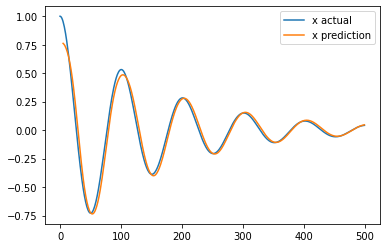

In [83]:
t = np.linspace(1, 500, 500)

ODE_Target = np.transpose(np.array([t, Critical_Dumped], np.float32))
ODE_Output = np.transpose(np.array([t[n_sampling:], y_prediction_test[:,0]], np.float32))

ODE_Target_PD =  pd.DataFrame(data=ODE_Target[:,:],   
              index=ODE_Target[:,0],    
              columns=['t', 'x actual'])  

ODE_Output_PD = pd.DataFrame(data=ODE_Output[:,:],   
              index=ODE_Output[:,0],    
              columns=['t', 'x prediction'])  

ODE_PD = pd.merge(ODE_Target_PD, ODE_Output_PD, on='t', how='left')

ODE_PD[['x actual','x prediction']].plot()
print("Gunawan")
print("181011400866")